In [1]:
import yfinance as yf
import pandas as pd

# Definisikan ticker untuk Bitcoin
ticker = 'BTC-USD'

# Definisikan tanggal awal dan akhir
start_date = '2016-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Download data harga Bitcoin
data = yf.download(ticker, start=start_date, end=end_date)

# Simpan data ke dalam file CSV
data.to_csv('bitcoin_price_since_2016.csv')

print("Data harga Bitcoin sejak 2016 berhasil diunduh dan disimpan sebagai 'bitcoin_price_since_2016.csv'")

[*********************100%%**********************]  1 of 1 completed

Data harga Bitcoin sejak 2016 berhasil diunduh dan disimpan sebagai 'bitcoin_price_since_2016.csv'


C:\Users\basnugroho\AppData\Local\Temp\ipykernel_281524\1986602925.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(data['Year'].unique()))


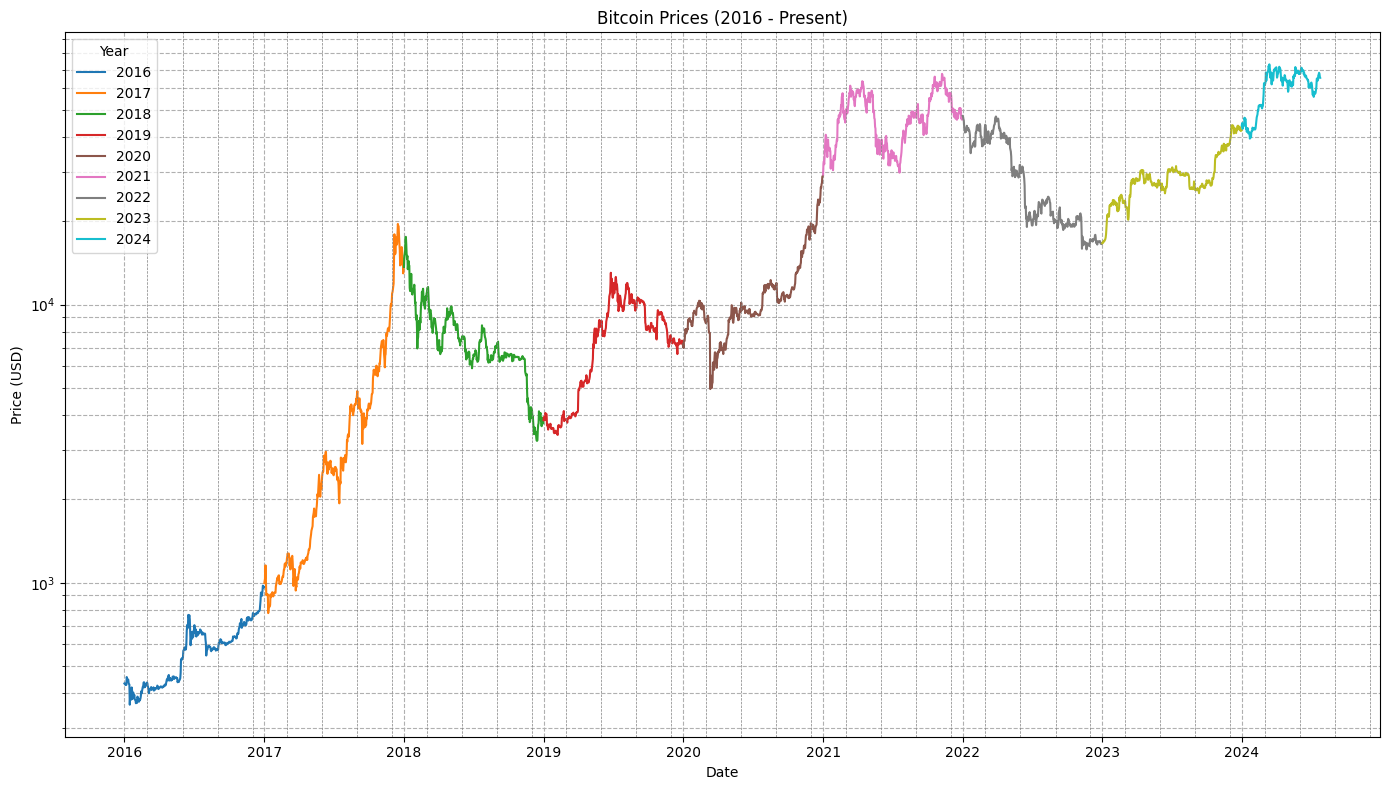

In [2]:
import matplotlib.pyplot as plt

# Load the data
file_path = 'bitcoin_price_since_2016.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Add a 'Year' column for grouping
data['Year'] = data.index.year

# Create a plot
plt.figure(figsize=(14, 8))

# Define a color map
colors = plt.cm.get_cmap('tab10', len(data['Year'].unique()))

# Plot each year with a different color
for i, (year, group) in enumerate(data.groupby('Year')):
    plt.plot(group.index, group['Close'], label=year, color=colors(i))

# Set log scale for y-axis
plt.yscale('log')

# Add vertical dashed lines for each quarter
for year in data['Year'].unique():
    for month in [3, 6, 9, 12]:
        plt.axvline(pd.Timestamp(f'{year}-{month:02d}-01'), color='gray', linestyle='--', linewidth=0.5)

# Customize the plot
plt.title('Bitcoin Prices (2016 - Present)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Year')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()


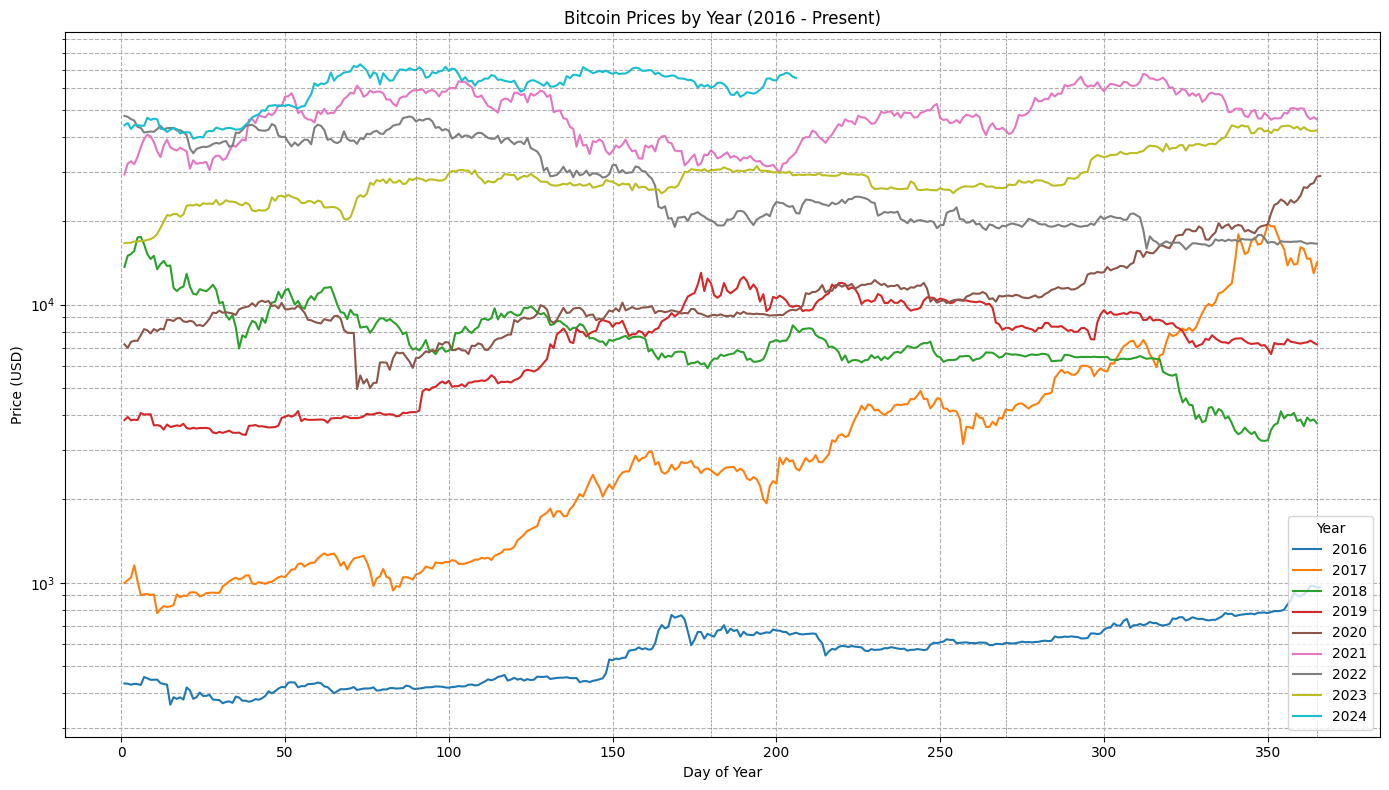

In [3]:
import matplotlib.dates as mdates

# Re-plot each year starting from the same x-axis point (day of the year)
plt.figure(figsize=(14, 8))

for i, (year, group) in enumerate(data.groupby('Year')):
    group = group.copy()
    group['DayOfYear'] = group.index.day_of_year
    plt.plot(group['DayOfYear'], group['Close'], label=year, color=colors(i))

# Set log scale for y-axis
plt.yscale('log')

# Add vertical dashed lines for each quarter
for quarter in [90, 180, 270, 365]:
    plt.axvline(quarter, color='gray', linestyle='--', linewidth=0.5)

# Customize the plot
plt.title('Bitcoin Prices by Year (2016 - Present)')
plt.xlabel('Day of Year')
plt.ylabel('Price (USD)')
plt.legend(title='Year')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()

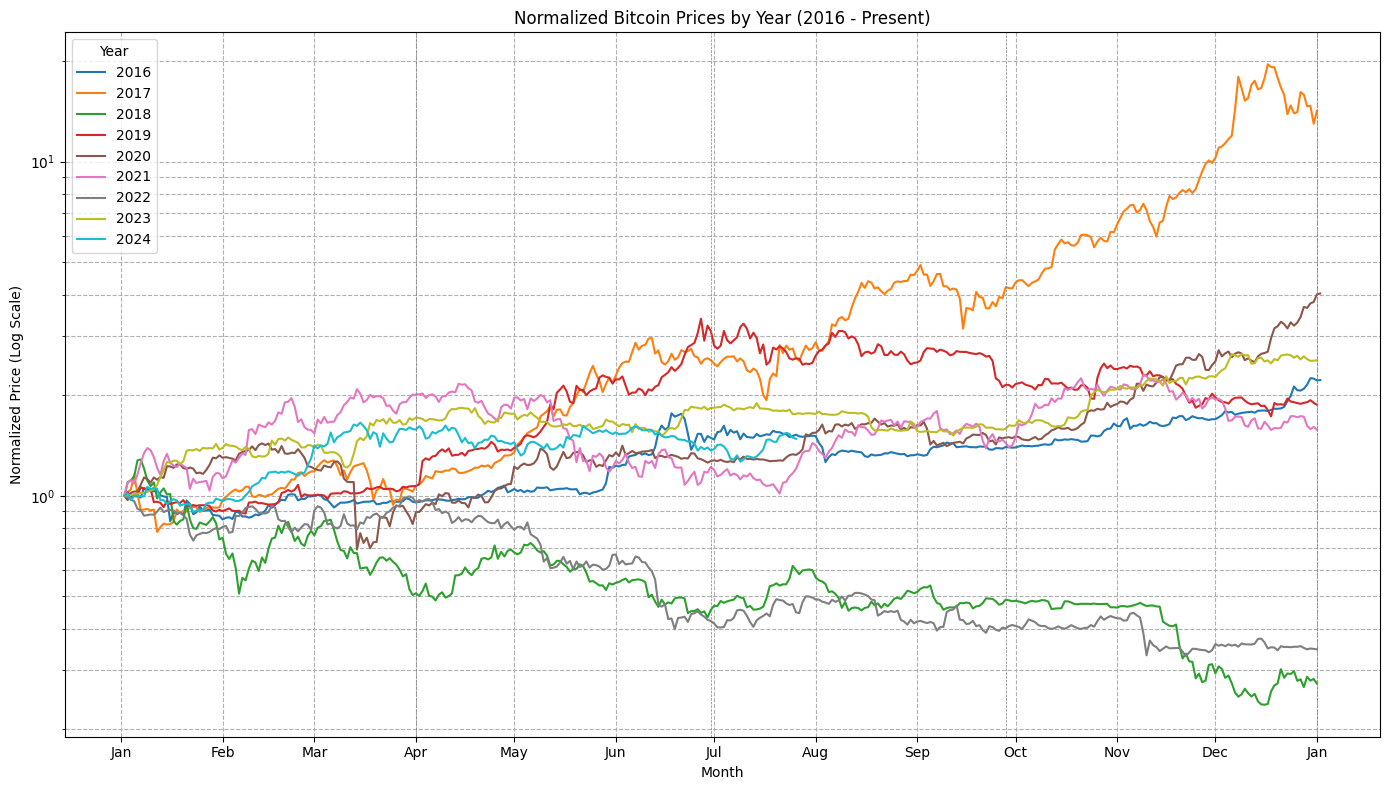

In [4]:
# Normalize each year's data to start from the same point
plt.figure(figsize=(14, 8))

# Plot each year with different color
for i, (year, group) in enumerate(data.groupby('Year')):
    group = group.copy()
    group['DayOfYear'] = group.index.day_of_year
    normalized_price = group['Close'] / group['Close'].iloc[0]  # Normalize prices
    plt.plot(group['DayOfYear'], normalized_price, label=year, color=colors(i))

# Set x-axis to show month names
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

# Set log scale for y-axis
plt.yscale('log')

# Add vertical dashed lines for each quarter
for quarter in [90, 180, 270, 365]:
    plt.axvline(quarter, color='gray', linestyle='--', linewidth=0.5)

# Customize the plot
plt.title('Normalized Bitcoin Prices by Year (2016 - Present)')
plt.xlabel('Month')
plt.ylabel('Normalized Price (Log Scale)')
plt.legend(title='Year')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()

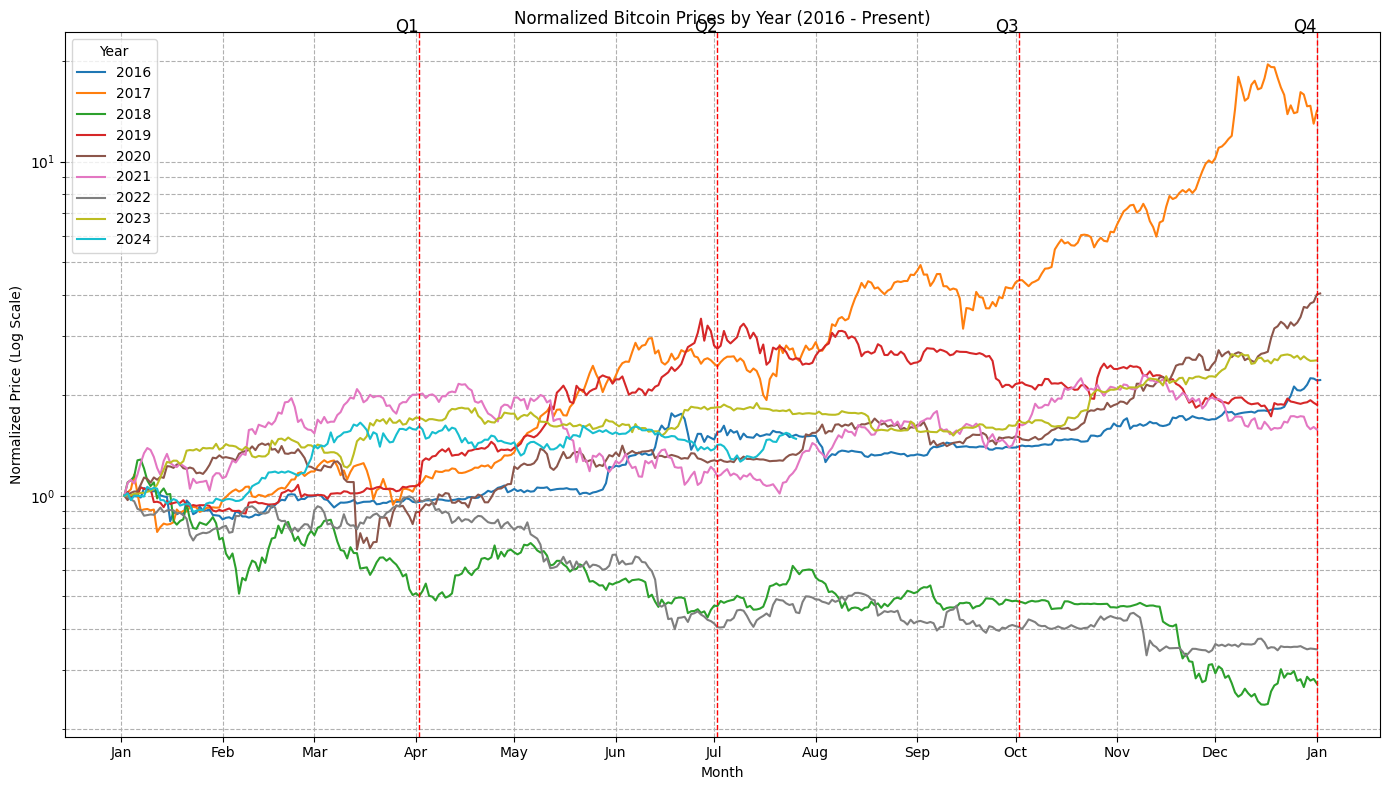

In [5]:
# Correct quarter positions for vertical lines
quarter_days = [31 + 28 + 31 + 1, 31 + 28 + 31 + 30 + 1, 31 + 28 + 31 + 30 + 31 + 1, 31 + 28 + 31 + 30 + 31 + 30 + 1]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']

plt.figure(figsize=(14, 8))

# Plot each year with different color
for i, (year, group) in enumerate(data.groupby('Year')):
    group = group.copy()
    group['DayOfYear'] = group.index.day_of_year
    normalized_price = group['Close'] / group['Close'].iloc[0]  # Normalize prices
    plt.plot(group['DayOfYear'], normalized_price, label=year, color=colors(i))

# Set x-axis to show month names
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

# Set log scale for y-axis
plt.yscale('log')

# Add vertical dashed lines for each quarter
quarter_days_actual = [91, 182, 274, 365]
for day, label in zip(quarter_days_actual, quarter_labels):
    plt.axvline(day, color='red', linestyle='--', linewidth=1)
    plt.text(day, plt.ylim()[1], label, horizontalalignment='right', color='black', fontsize=12)

# Customize the plot
plt.title('Normalized Bitcoin Prices by Year (2016 - Present)')
plt.xlabel('Month')
plt.ylabel('Normalized Price (Log Scale)')
plt.legend(title='Year')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\basnugroho\AppData\Local\Temp\ipykernel_281524\2437254923.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(halving_periods))


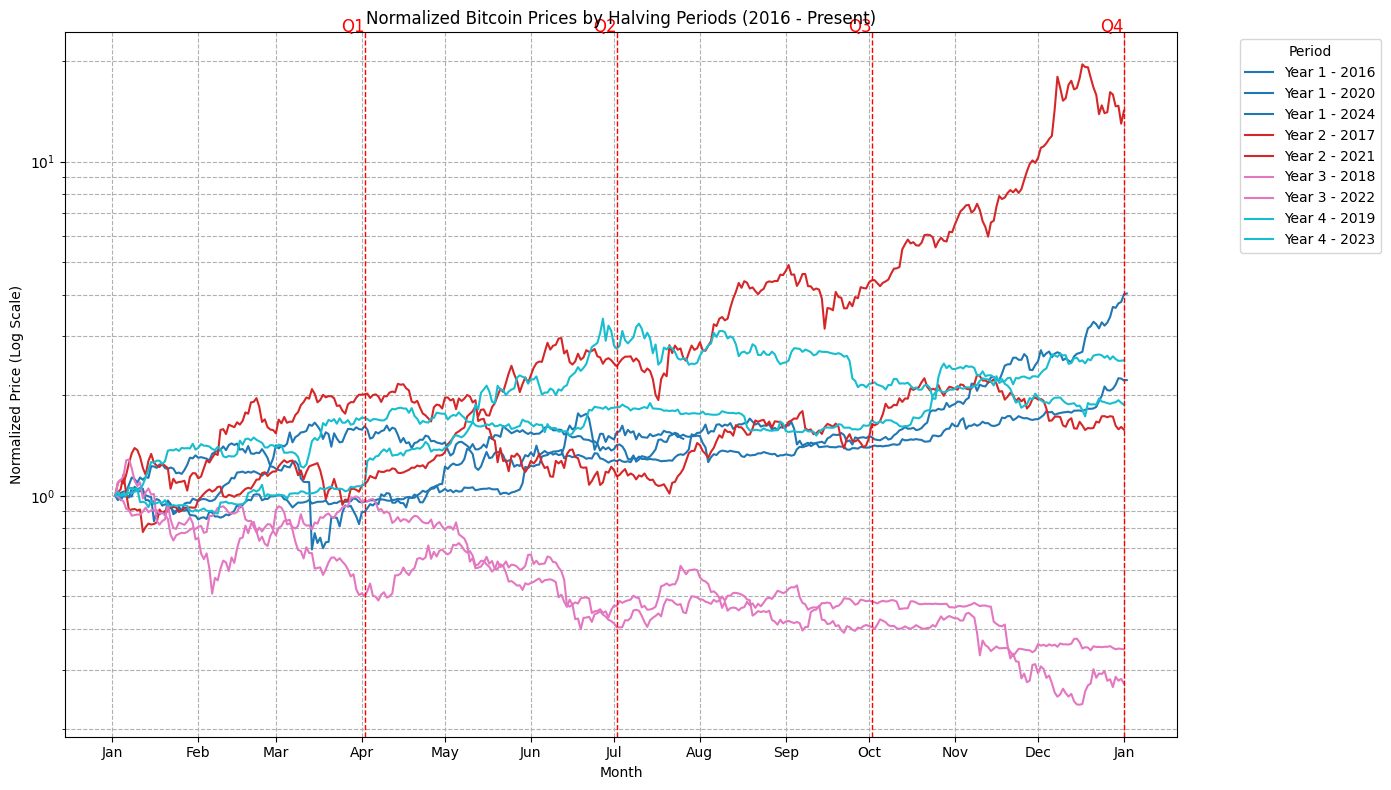

In [6]:
# Define halving periods and corresponding years
halving_periods = {
    'Year 1': [2016, 2020, 2024],
    'Year 2': [2017, 2021],
    'Year 3': [2018, 2022],
    'Year 4': [2019, 2023],
}

# Prepare the plot
plt.figure(figsize=(14, 8))

# Define a color map
colors = plt.cm.get_cmap('tab10', len(halving_periods))

# Plot each halving period with a different color
for i, (period, years) in enumerate(halving_periods.items()):
    for year in years:
        if year in data.index.year:
            group = data[data.index.year == year].copy()
            group['DayOfYear'] = group.index.day_of_year
            normalized_price = group['Close'] / group['Close'].iloc[0]  # Normalize prices
            plt.plot(group['DayOfYear'], normalized_price, label=f'{period} - {year}', color=colors(i))

# Set x-axis to show month names
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

# Set log scale for y-axis
plt.yscale('log')

# Add vertical dashed lines for each quarter
quarter_days_actual = [91, 182, 274, 365]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
for day, label in zip(quarter_days_actual, quarter_labels):
    plt.axvline(day, color='red', linestyle='--', linewidth=1)
    plt.text(day, plt.ylim()[1], label, horizontalalignment='right', color='red', fontsize=12)

# Customize the plot
plt.title('Normalized Bitcoin Prices by Halving Periods (2016 - Present)')
plt.xlabel('Month')
plt.ylabel('Normalized Price (Log Scale)')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()

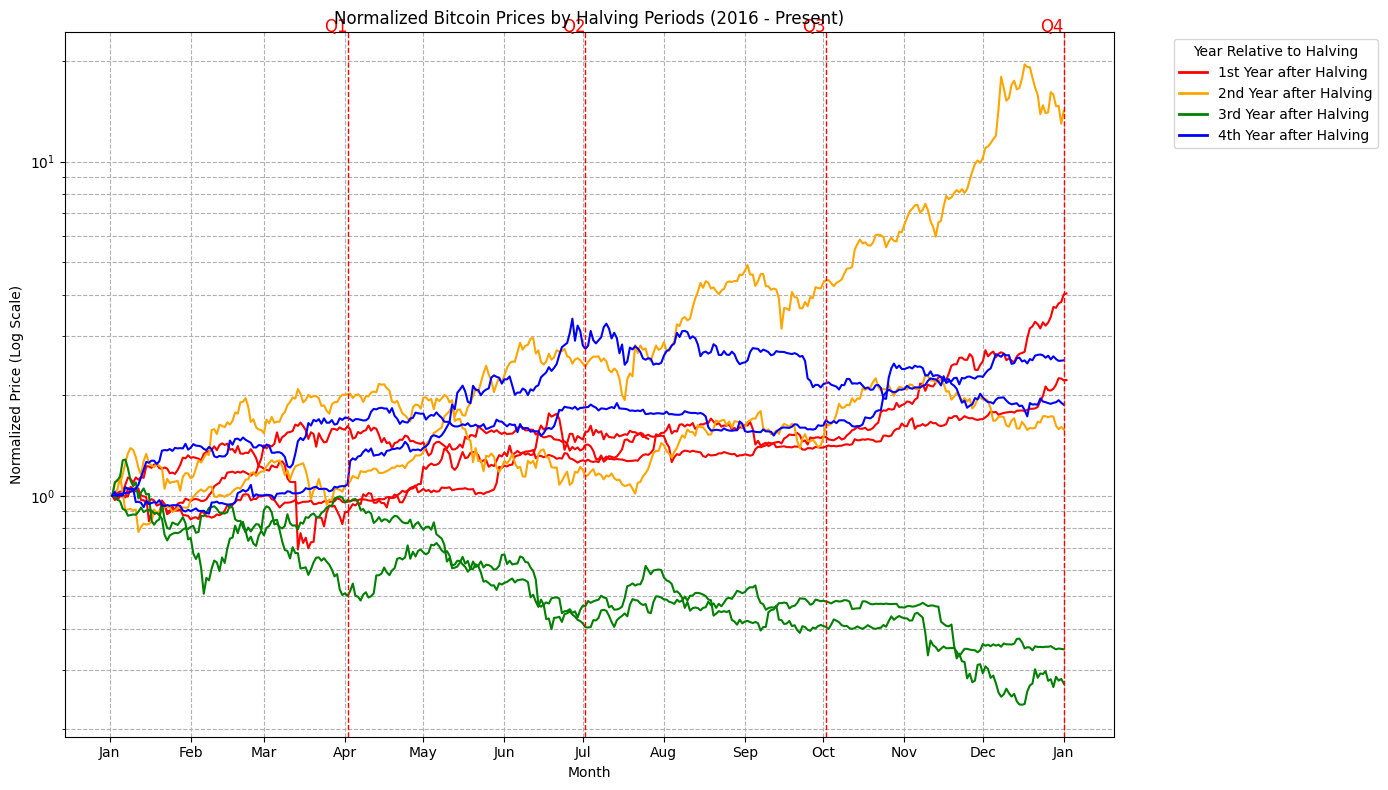

In [7]:
# Define colors for each halving year relative period for consistent color scheme
halving_colors = {
    'Year 1': 'red',
    'Year 2': 'orange',
    'Year 3': 'green',
    'Year 4': 'blue',
}

# Prepare the plot
plt.figure(figsize=(14, 8))

# Plot each halving period with a defined color scheme
for period, years in halving_periods.items():
    for year in years:
        if year in data.index.year:
            group = data[data.index.year == year].copy()
            group['DayOfYear'] = group.index.day_of_year
            normalized_price = group['Close'] / group['Close'].iloc[0]  # Normalize prices
            plt.plot(group['DayOfYear'], normalized_price, label=f'{year}', color=halving_colors[period])

# Set x-axis to show month names
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

# Set log scale for y-axis
plt.yscale('log')

# Add vertical dashed lines for each quarter
quarter_days_actual = [91, 182, 274, 365]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
for day, label in zip(quarter_days_actual, quarter_labels):
    plt.axvline(day, color='red', linestyle='--', linewidth=1)
    plt.text(day, plt.ylim()[1], label, horizontalalignment='right', color='red', fontsize=12)

# Customize the plot
plt.title('Normalized Bitcoin Prices by Halving Periods (2016 - Present)')
plt.xlabel('Month')
plt.ylabel('Normalized Price (Log Scale)')
# Custom legend
custom_lines = [
    plt.Line2D([0], [0], color='red', lw=2),
    plt.Line2D([0], [0], color='orange', lw=2),
    plt.Line2D([0], [0], color='green', lw=2),
    plt.Line2D([0], [0], color='blue', lw=2),
]
plt.legend(custom_lines, ['1st Year after Halving', '2nd Year after Halving', '3rd Year after Halving', '4th Year after Halving'],
           title='Year Relative to Halving', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()

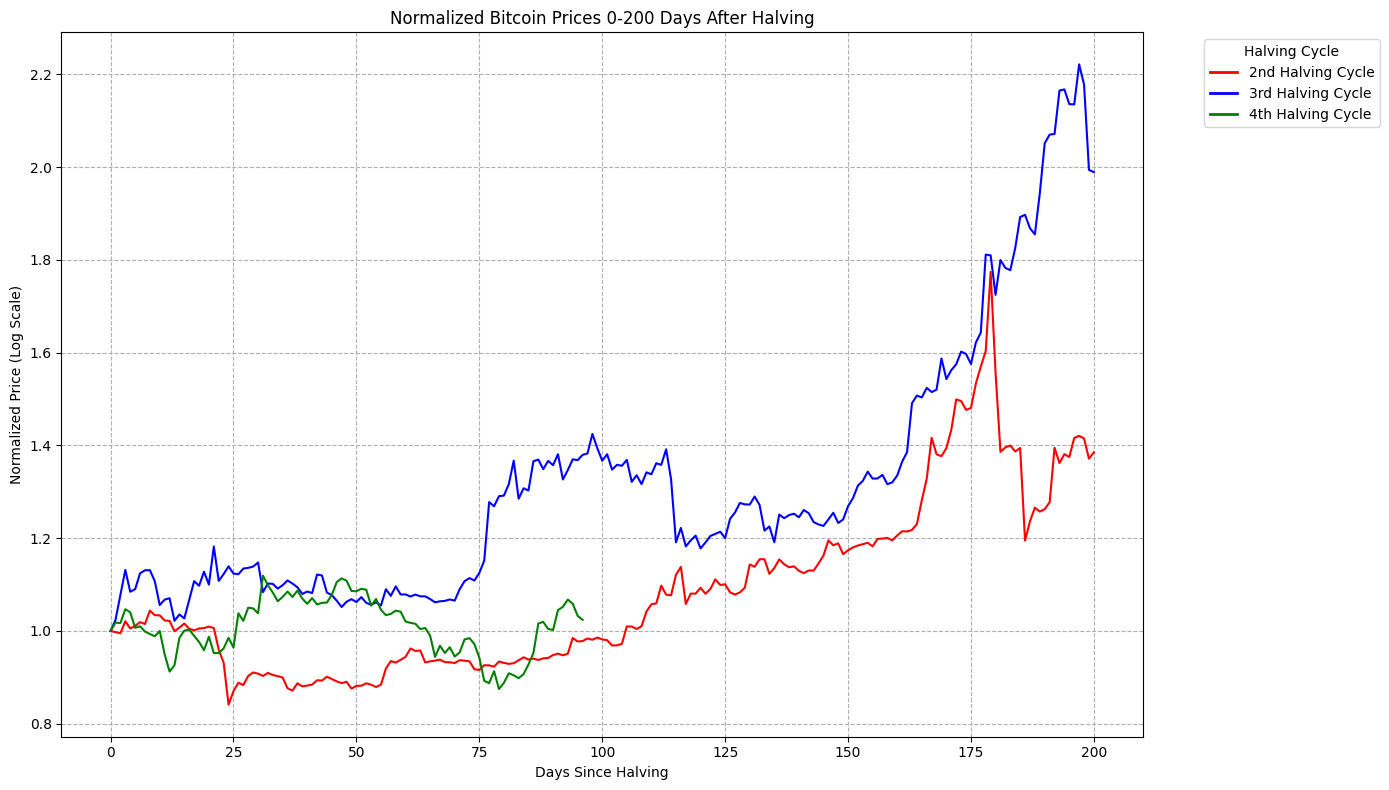

In [8]:
# Update the halving dates with correct date for 2024
halving_dates = {
    2016: '2016-07-09',
    2020: '2020-05-11',
    2024: '2024-04-19',  # Corrected date for 2024 halving
}

# Define colors for each halving cycle for consistent color scheme
halving_colors = {
    2: 'red',    # Halving 2 (2016)
    3: 'blue',   # Halving 3 (2020)
    4: 'green',  # Halving 4 (2024)
}

# Define the halving cycles for each year
halving_cycles = {
    2016: 2,
    2017: 2,
    2018: 2,
    2019: 2,
    2020: 3,
    2021: 3,
    2022: 3,
    2023: 3,
    2024: 4,
}

# Prepare the plot
plt.figure(figsize=(14, 8))

# Plot each halving period from day 0 to 200 with distinct colors
for year, cycle in halving_cycles.items():
    if year in halving_dates:
        halving_date = pd.to_datetime(halving_dates[year])
        halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=200))].copy()
        halving_data['DaysSinceHalving'] = (halving_data.index - halving_date).days
        normalized_price = halving_data['Close'] / halving_data['Close'].iloc[0]  # Normalize prices
        plt.plot(halving_data['DaysSinceHalving'], normalized_price, label=f'{year}', color=halving_colors[cycle])

# Customize the plot
plt.title('Normalized Bitcoin Prices 0-200 Days After Halving')
plt.xlabel('Days Since Halving')
plt.ylabel('Normalized Price (Log Scale)')
# Custom legend
custom_lines = [
    plt.Line2D([0], [0], color='red', lw=2),
    plt.Line2D([0], [0], color='blue', lw=2),
    plt.Line2D([0], [0], color='green', lw=2),
]
plt.legend(custom_lines, ['2nd Halving Cycle', '3rd Halving Cycle', '4th Halving Cycle'],
           title='Halving Cycle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

# Display the plot
plt.show()

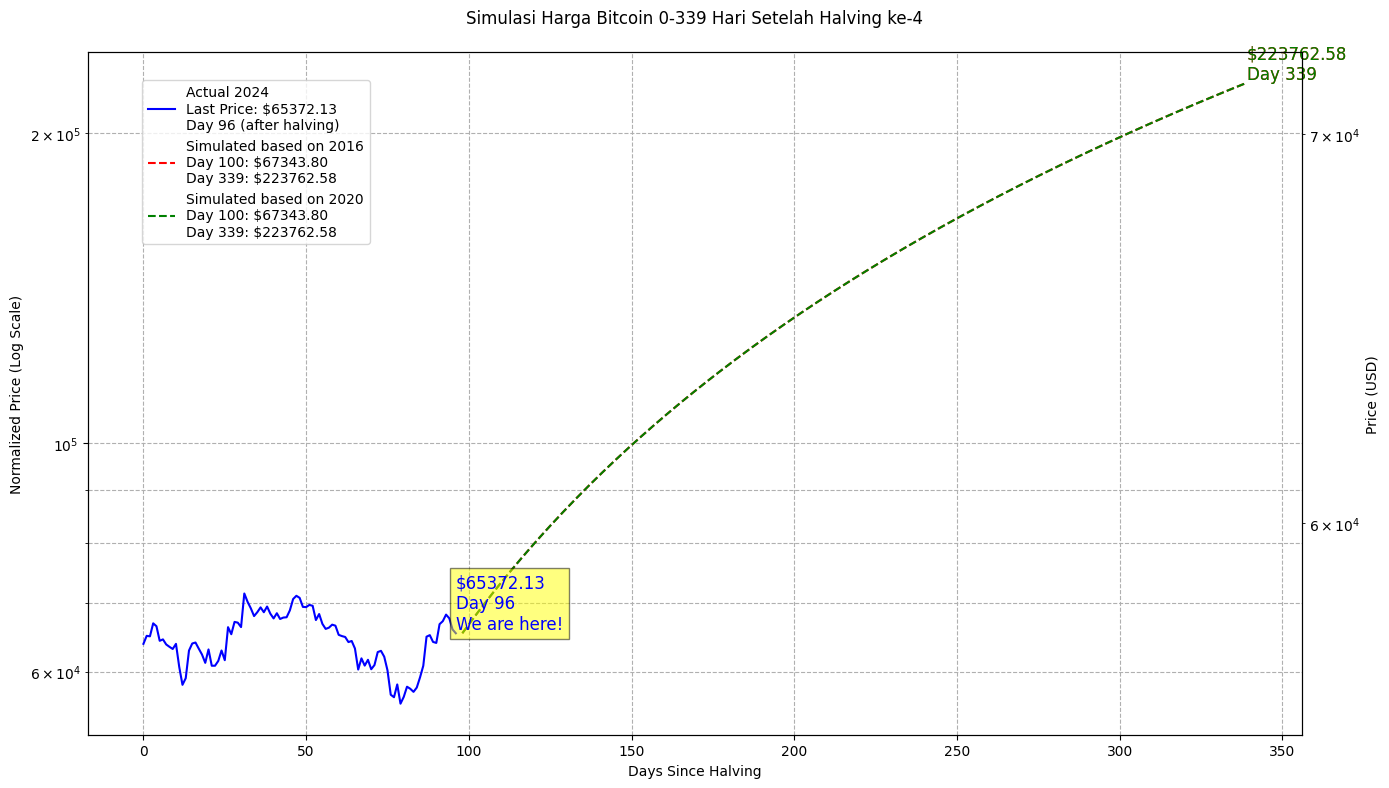

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
file_path = 'bitcoin_price_since_2016.csv'  # Update with your actual file path
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Define the halving dates with correct date for 2024
halving_dates = {
    2016: '2016-07-09',
    2020: '2020-05-11',
    2024: '2024-04-19',  # Corrected date for 2024 halving
}

# Define the halving cycles for each year
halving_cycles = {
    2016: 2,
    2017: 2,
    2018: 2,
    2019: 2,
    2020: 3,
    2021: 3,
    2022: 3,
    2023: 3,
    2024: 4,
}

# Calculate the correct current day since the halving
halving_date_2024 = pd.to_datetime(halving_dates[2024])
days_since_halving_2024_corrected = (pd.Timestamp.today() - halving_date_2024).days

# Prepare the data for regression (use only halving 2 and 3 for training)
X_train = []
y_train = []

for year, cycle in halving_cycles.items():
    if cycle in [2, 3]:
        if year in halving_dates:
            halving_date = pd.to_datetime(halving_dates[year])
            halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=339))].copy()
            halving_data['DaysSinceHalving'] = (halving_data.index - halving_date).days
            normalized_price = halving_data['Close'] / halving_data['Close'].iloc[0]  # Normalize prices
            
            X_train.extend(halving_data['DaysSinceHalving'].values.reshape(-1, 1))
            y_train.extend(normalized_price.values)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the normalized price for the 4th halving cycle
days = np.arange(0, 340).reshape(-1, 1)
predicted_normalized_prices = model.predict(days)

# Get the starting price of the 4th halving cycle for denormalization
start_price_2024 = data.loc[halving_date_2024]['Close']

# Simulate the prices for the 4th halving cycle
simulated_prices_2016 = predicted_normalized_prices * start_price_2024
simulated_prices_2020 = predicted_normalized_prices * start_price_2024

# Adjust the simulation to start from the latest price by recalculating the simulated prices
latest_price = data.loc[halving_date_2024:]['Close'].iloc[-1]
adjustment_factor_2016 = latest_price / simulated_prices_2016[days_since_halving_2024_corrected]
adjustment_factor_2020 = latest_price / simulated_prices_2020[days_since_halving_2024_corrected]

simulated_prices_2016_adjusted = simulated_prices_2016 * adjustment_factor_2016
simulated_prices_2020_adjusted = simulated_prices_2020 * adjustment_factor_2020

# Ensure that we only use the remaining days after the latest actual price
remaining_days = 339 - days_since_halving_2024_corrected

# Actual days and prices for 2024 halving
actual_days = (data.loc[halving_date_2024:halving_date_2024 + pd.DateOffset(days=339)].index - halving_date_2024).days
actual_prices = data.loc[halving_date_2024:halving_date_2024 + pd.DateOffset(days=339)]['Close']

# Convert actual_days to list for indexing
actual_days_list = actual_days.tolist()

# Prepare the plot including actual prices and adjusted simulations with secondary y-axis for USD price
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the actual prices for the 4th halving cycle
ax1.plot(actual_days, actual_prices, label=f'Actual 2024\nLast Price: ${actual_prices.iloc[-1]:.2f}\nDay {actual_days_list[-1]} (after halving)', color='blue', linestyle='-')

# Plot the adjusted simulated prices based on 2016 halving cycle
adjusted_days_2016 = np.arange(days_since_halving_2024_corrected + 1, days_since_halving_2024_corrected + remaining_days + 1)
ax1.plot(adjusted_days_2016, simulated_prices_2016_adjusted[days_since_halving_2024_corrected:days_since_halving_2024_corrected + remaining_days], label=f'Simulated based on 2016\nDay 100: ${simulated_prices_2016_adjusted[100]:.2f}\nDay 339: ${simulated_prices_2016_adjusted[338]:.2f}', color='red', linestyle='--')

# Plot the adjusted simulated prices based on 2020 halving cycle
adjusted_days_2020 = np.arange(days_since_halving_2024_corrected + 1, days_since_halving_2024_corrected + remaining_days + 1)
ax1.plot(adjusted_days_2020, simulated_prices_2020_adjusted[days_since_halving_2024_corrected:days_since_halving_2024_corrected + remaining_days], label=f'Simulated based on 2020\nDay 100: ${simulated_prices_2020_adjusted[100]:.2f}\nDay 339: ${simulated_prices_2020_adjusted[338]:.2f}', color='green', linestyle='--')

# Create a secondary y-axis for the linear scale prices of the 4th halving cycle
ax2 = ax1.twinx()
ax2.set_ylabel('Price (USD)')
ax2.plot(actual_days, actual_prices, color='blue', linestyle='-', alpha=0)
ax2.set_yscale('log')

# Label the end points of the simulated prices
ax1.text(adjusted_days_2016[-1], simulated_prices_2016_adjusted[days_since_halving_2024_corrected + remaining_days - 1], f'${simulated_prices_2016_adjusted[days_since_halving_2024_corrected + remaining_days - 1]:.2f}\nDay {adjusted_days_2016[-1]}', color='red', fontsize=12, verticalalignment='bottom')
ax1.text(adjusted_days_2020[-1], simulated_prices_2020_adjusted[days_since_halving_2024_corrected + remaining_days - 1], f'${simulated_prices_2020_adjusted[days_since_halving_2024_corrected + remaining_days - 1]:.2f}\nDay {adjusted_days_2020[-1]}', color='green', fontsize=12, verticalalignment='bottom')

# Label the last actual price with "We are here!" indication
ax1.text(actual_days_list[-1], actual_prices.iloc[-1], f'${actual_prices.iloc[-1]:.2f}\nDay {actual_days_list[-1]}\nWe are here!', color='blue', fontsize=12, verticalalignment='bottom', bbox=dict(facecolor='yellow', alpha=0.5))

# Set y-axis to log scale
ax1.set_yscale('log')
ax1.set_xlabel('Days Since Halving')
ax1.set_ylabel('Normalized Price (Log Scale)')

# Customize the plot
fig.suptitle('Simulasi Harga Bitcoin 0-339 Hari Setelah Halving ke-4')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True, which="both", ls="--")
fig.tight_layout()

# Display the plot
plt.show()


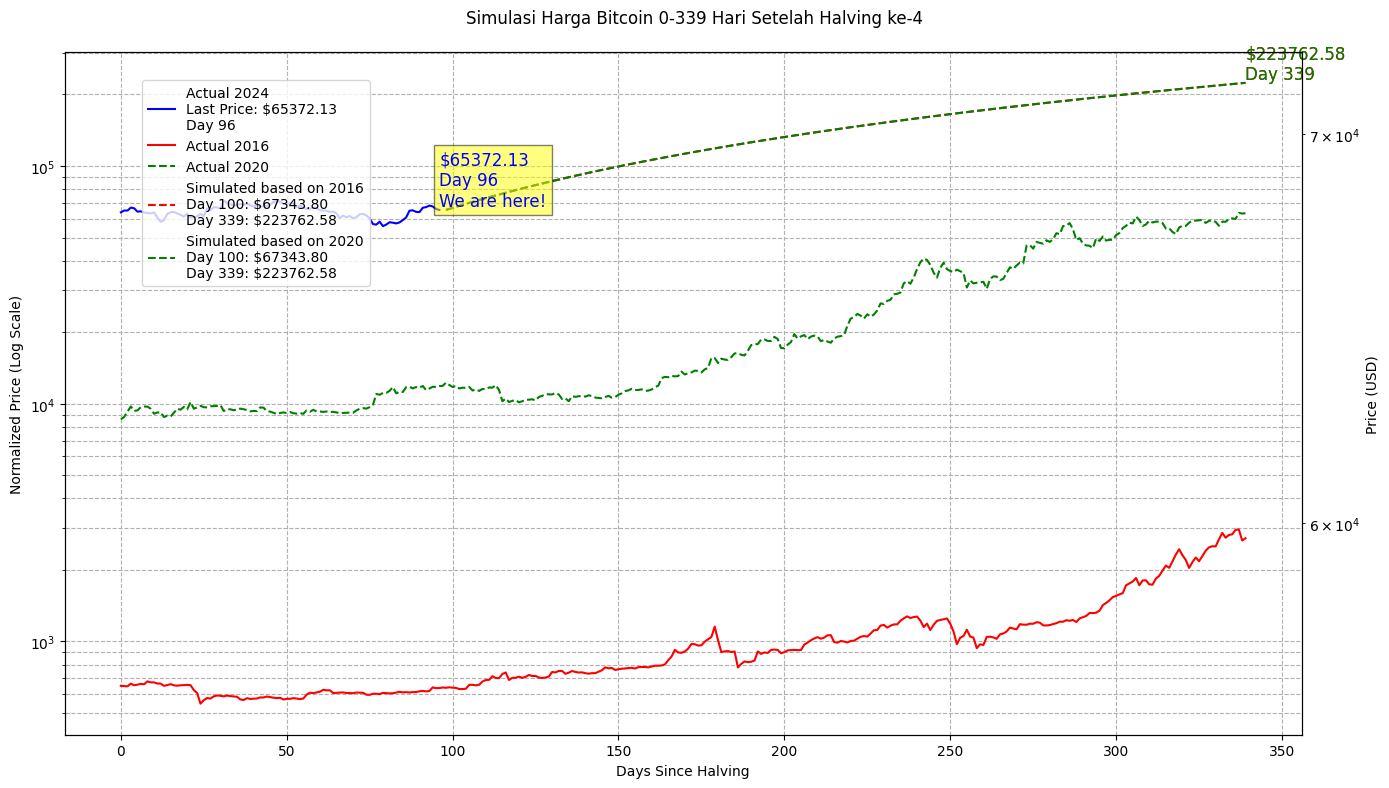

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'bitcoin_price_since_2016.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Define the halving dates with correct date for 2024
halving_dates = {
    2016: '2016-07-09',
    2020: '2020-05-11',
    2024: '2024-04-19',
}

# Define the halving cycles for each year
halving_cycles = {
    2016: 2,
    2017: 2,
    2018: 2,
    2019: 2,
    2020: 3,
    2021: 3,
    2022: 3,
    2023: 3,
    2024: 4,
}

# Calculate the correct current day since the halving
halving_date_2024 = pd.to_datetime(halving_dates[2024])
days_since_halving_2024_corrected = (pd.Timestamp.today() - halving_date_2024).days

# Prepare the data for regression (use only halving 2 and 3 for training)
X_train = []
y_train = []

for year, cycle in halving_cycles.items():
    if cycle in [2, 3]:
        if year in halving_dates:
            halving_date = pd.to_datetime(halving_dates[year])
            halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=339))].copy()
            halving_data['DaysSinceHalving'] = (halving_data.index - halving_date).days
            normalized_price = halving_data['Close'] / halving_data['Close'].iloc[0]  # Normalize prices
            
            X_train.extend(halving_data['DaysSinceHalving'].values.reshape(-1, 1))
            y_train.extend(normalized_price.values)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the normalized price for the 4th halving cycle
days = np.arange(0, 340).reshape(-1, 1)
predicted_normalized_prices = model.predict(days)

# Get the starting price of the 4th halving cycle for denormalization
start_price_2024 = data.loc[halving_date_2024]['Close']

# Simulate the prices for the 4th halving cycle
simulated_prices_2016 = predicted_normalized_prices * start_price_2024
simulated_prices_2020 = predicted_normalized_prices * start_price_2024

# Adjust the simulation to start from the latest price by recalculating the simulated prices
latest_price = data.loc[halving_date_2024:]['Close'].iloc[-1]
adjustment_factor_2016 = latest_price / simulated_prices_2016[days_since_halving_2024_corrected]
adjustment_factor_2020 = latest_price / simulated_prices_2020[days_since_halving_2024_corrected]

simulated_prices_2016_adjusted = simulated_prices_2016 * adjustment_factor_2016
simulated_prices_2020_adjusted = simulated_prices_2020 * adjustment_factor_2020

# Ensure that we only use the remaining days after the latest actual price
remaining_days = 339 - days_since_halving_2024_corrected

# Actual days and prices for 2024 halving
actual_days = (data.loc[halving_date_2024:halving_date_2024 + pd.DateOffset(days=339)].index - halving_date_2024).days
actual_prices = data.loc[halving_date_2024:halving_date_2024 + pd.DateOffset(days=339)]['Close']

# Convert actual_days to list for indexing
actual_days_list = actual_days.tolist()

# Prepare the plot including actual prices, adjusted simulations, and prices from previous halvings
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the actual prices for the 4th halving cycle
ax1.plot(actual_days, actual_prices, label=f'Actual 2024\nLast Price: ${actual_prices.iloc[-1]:.2f}\nDay {actual_days_list[-1]}', color='blue', linestyle='-')

# Plot the prices for the 2nd and 3rd halving cycles
for year, cycle in halving_cycles.items():
    if cycle in [2, 3]:
        if year in halving_dates:
            halving_date = pd.to_datetime(halving_dates[year])
            halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=339))].copy()
            halving_days = (halving_data.index - halving_date).days
            label = f'Actual {year}' if cycle == 2 else f'Actual {year}'
            color = 'red' if cycle == 2 else 'green'
            linestyle = '-' if cycle == 2 else '--'
            ax1.plot(halving_days, halving_data['Close'], label=label, color=color, linestyle=linestyle)

# Plot the adjusted simulated prices based on 2016 halving cycle
adjusted_days_2016 = np.arange(days_since_halving_2024_corrected + 1, days_since_halving_2024_corrected + remaining_days + 1)
ax1.plot(adjusted_days_2016, simulated_prices_2016_adjusted[days_since_halving_2024_corrected:days_since_halving_2024_corrected + remaining_days], label=f'Simulated based on 2016\nDay 100: ${simulated_prices_2016_adjusted[100]:.2f}\nDay 339: ${simulated_prices_2016_adjusted[338]:.2f}', color='red', linestyle='--')

# Plot the adjusted simulated prices based on 2020 halving cycle
adjusted_days_2020 = np.arange(days_since_halving_2024_corrected + 1, days_since_halving_2024_corrected + remaining_days + 1)
ax1.plot(adjusted_days_2020, simulated_prices_2020_adjusted[days_since_halving_2024_corrected:days_since_halving_2024_corrected + remaining_days], label=f'Simulated based on 2020\nDay 100: ${simulated_prices_2020_adjusted[100]:.2f}\nDay 339: ${simulated_prices_2020_adjusted[338]:.2f}', color='green', linestyle='--')

# Create a secondary y-axis for the linear scale prices of the 4th halving cycle
ax2 = ax1.twinx()
ax2.set_ylabel('Price (USD)')
ax2.plot(actual_days, actual_prices, color='blue', linestyle='-', alpha=0)
ax2.set_yscale('log')

# Label the end points of the simulated prices
ax1.text(adjusted_days_2016[-1], simulated_prices_2016_adjusted[days_since_halving_2024_corrected + remaining_days - 1], f'${simulated_prices_2016_adjusted[days_since_halving_2024_corrected + remaining_days - 1]:.2f}\nDay {adjusted_days_2016[-1]}', color='red', fontsize=12, verticalalignment='bottom')
ax1.text(adjusted_days_2020[-1], simulated_prices_2020_adjusted[days_since_halving_2024_corrected + remaining_days - 1], f'${simulated_prices_2020_adjusted[days_since_halving_2024_corrected + remaining_days - 1]:.2f}\nDay {adjusted_days_2020[-1]}', color='green', fontsize=12, verticalalignment='bottom')

# Label the last actual price with "We are here!" indication
ax1.text(actual_days_list[-1], actual_prices.iloc[-1], f'${actual_prices.iloc[-1]:.2f}\nDay {actual_days_list[-1]}\nWe are here!', color='blue', fontsize=12, verticalalignment='bottom', bbox=dict(facecolor='yellow', alpha=0.5))

# Set y-axis to log scale
ax1.set_yscale('log')
ax1.set_xlabel('Days Since Halving')
ax1.set_ylabel('Normalized Price (Log Scale)')

# Customize the plot
fig.suptitle('Simulasi Harga Bitcoin 0-339 Hari Setelah Halving ke-4')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True, which="both", ls="--")
fig.tight_layout()

# Display the plot
plt.show()

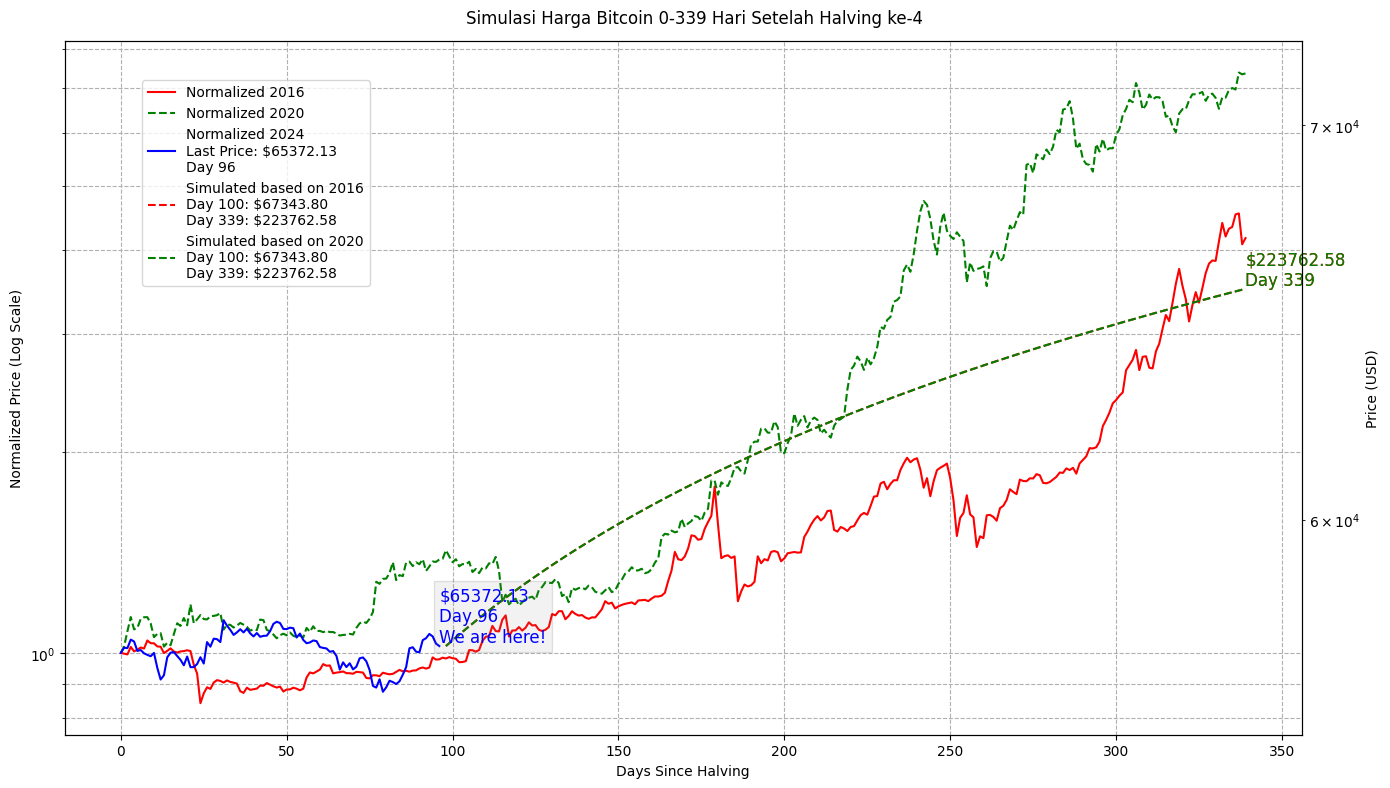

In [15]:
# Prepare the plot including actual prices, adjusted simulations, and normalized prices from previous halvings
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the normalized prices for the 2nd and 3rd halving cycles
for year, cycle in halving_cycles.items():
    if cycle in [2, 3]:
        if year in halving_dates:
            halving_date = pd.to_datetime(halving_dates[year])
            halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=339))].copy()
            halving_data['DaysSinceHalving'] = (halving_data.index - halving_date).days
            normalized_price = halving_data['Close'] / halving_data['Close'].iloc[0]  # Normalize prices
            label = f'Normalized {year}' if cycle == 2 else f'Normalized {year}'
            color = 'red' if cycle == 2 else 'green'
            linestyle = '-' if cycle == 2 else '--'
            ax1.plot(halving_data['DaysSinceHalving'], normalized_price, label=label, color=color, linestyle=linestyle)

# Plot the normalized prices for the 4th halving cycle
halving_data_2024 = data[(data.index >= halving_date_2024) & (data.index <= halving_date_2024 + pd.DateOffset(days=339))].copy()
halving_data_2024['DaysSinceHalving'] = (halving_data_2024.index - halving_date_2024).days
normalized_price_2024 = halving_data_2024['Close'] / halving_data_2024['Close'].iloc[0]
ax1.plot(halving_data_2024['DaysSinceHalving'], normalized_price_2024, label=f'Normalized 2024\nLast Price: ${actual_prices.iloc[-1]:.2f}\nDay {actual_days_list[-1]}', color='blue', linestyle='-')

# Plot the adjusted simulated prices based on 2016 halving cycle
adjusted_days_2016 = np.arange(days_since_halving_2024_corrected + 1, days_since_halving_2024_corrected + remaining_days + 1)
ax1.plot(adjusted_days_2016, simulated_prices_2016_adjusted[days_since_halving_2024_corrected:days_since_halving_2024_corrected + remaining_days] / start_price_2024, label=f'Simulated based on 2016\nDay 100: ${simulated_prices_2016_adjusted[100]:.2f}\nDay 339: ${simulated_prices_2016_adjusted[338]:.2f}', color='red', linestyle='--')

# Plot the adjusted simulated prices based on 2020 halving cycle
adjusted_days_2020 = np.arange(days_since_halving_2024_corrected + 1, days_since_halving_2024_corrected + remaining_days + 1)
ax1.plot(adjusted_days_2020, simulated_prices_2020_adjusted[days_since_halving_2024_corrected:days_since_halving_2024_corrected + remaining_days] / start_price_2024, label=f'Simulated based on 2020\nDay 100: ${simulated_prices_2020_adjusted[100]:.2f}\nDay 339: ${simulated_prices_2020_adjusted[338]:.2f}', color='green', linestyle='--')

# Create a secondary y-axis for the linear scale prices of the 4th halving cycle
ax2 = ax1.twinx()
ax2.set_ylabel('Price (USD)')
ax2.plot(halving_data_2024['DaysSinceHalving'], halving_data_2024['Close'], color='blue', linestyle='-', alpha=0)
ax2.set_yscale('log')

# Label the end points of the simulated prices
ax1.text(adjusted_days_2016[-1], simulated_prices_2016_adjusted[days_since_halving_2024_corrected + remaining_days - 1] / start_price_2024, f'${simulated_prices_2016_adjusted[days_since_halving_2024_corrected + remaining_days - 1]:.2f}\nDay {adjusted_days_2016[-1]}', color='red', fontsize=12, verticalalignment='bottom')
ax1.text(adjusted_days_2020[-1], simulated_prices_2020_adjusted[days_since_halving_2024_corrected + remaining_days - 1] / start_price_2024, f'${simulated_prices_2020_adjusted[days_since_halving_2024_corrected + remaining_days - 1]:.2f}\nDay {adjusted_days_2020[-1]}', color='green', fontsize=12, verticalalignment='bottom')

# Label the last actual price with "We are here!" indication
ax1.text(actual_days_list[-1], normalized_price_2024.iloc[-1], f'${actual_prices.iloc[-1]:.2f}\nDay {actual_days_list[-1]}\nWe are here!', color='blue', fontsize=12, verticalalignment='bottom', bbox=dict(facecolor='grey', alpha=0.1))

# Set y-axis to log scale
ax1.set_yscale('log')
ax1.set_xlabel('Days Since Halving')
ax1.set_ylabel('Normalized Price (Log Scale)')

# Customize the plot
fig.suptitle('Simulasi Harga Bitcoin 0-339 Hari Setelah Halving ke-4')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True, which="both", ls="--")
fig.tight_layout()

# Display the plot
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Load the data
file_path = 'bitcoin_price_since_2016.csv'  # Update with your actual file path
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Define the halving dates with correct date for 2024
halving_dates = {
    2016: '2016-07-09',
    2020: '2020-05-11',
    2024: '2024-04-19',
}

# Define the halving cycles for each year
halving_cycles = {
    2016: 2,
    2017: 2,
    2018: 2,
    2019: 2,
    2020: 3,
    2021: 3,
    2022: 3,
    2023: 3,
    2024: 4,
}

# Create a DataFrame for the comparison
comparison_df = pd.DataFrame()

# Define the days for the comparison
days = np.arange(0, 340)

# Get the prices for the 2nd and 3rd halving cycles
for year, cycle in halving_cycles.items():
    if cycle in [2, 3]:
        if year in halving_dates:
            halving_date = pd.to_datetime(halving_dates[year])
            halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=339))].copy()
            halving_data['DaysSinceHalving'] = (halving_data.index - halving_date).days
            halving_data = halving_data.set_index('DaysSinceHalving')
            comparison_df[f'Price {year} (USD)'] = halving_data['Close']

# Add the prices for the 4th halving cycle
halving_data_2024 = data[(data.index >= halving_date_2024) & (data.index <= halving_date_2024 + pd.DateOffset(days=339))].copy()
halving_data_2024['DaysSinceHalving'] = (halving_data_2024.index - halving_date_2024).days
halving_data_2024 = halving_data_2024.set_index('DaysSinceHalving')
comparison_df['Price 2024 (USD)'] = halving_data_2024['Close']

# Add the log scale prices
comparison_df['Log Scale'] = np.log10(comparison_df['Price 2024 (USD)'])

# Display the DataFrame
print(comparison_df.head())

# Save the DataFrame to a CSV file
comparison_df.to_csv('bitcoin_halving_comparison.csv')

                  Price 2016 (USD)  Price 2020 (USD)  Price 2024 (USD)  \
DaysSinceHalving                                                         
0                       650.960022       8601.795898      63843.570312   
1                       649.359985       8804.477539      64994.441406   
2                       647.658997       9269.987305      64926.644531   
3                       664.551025       9733.721680      66837.679688   
4                       654.468018       9328.197266      66407.273438   

                  Log Scale  
DaysSinceHalving             
0                  4.805117  
1                  4.812876  
2                  4.812423  
3                  4.825021  
4                  4.822216  


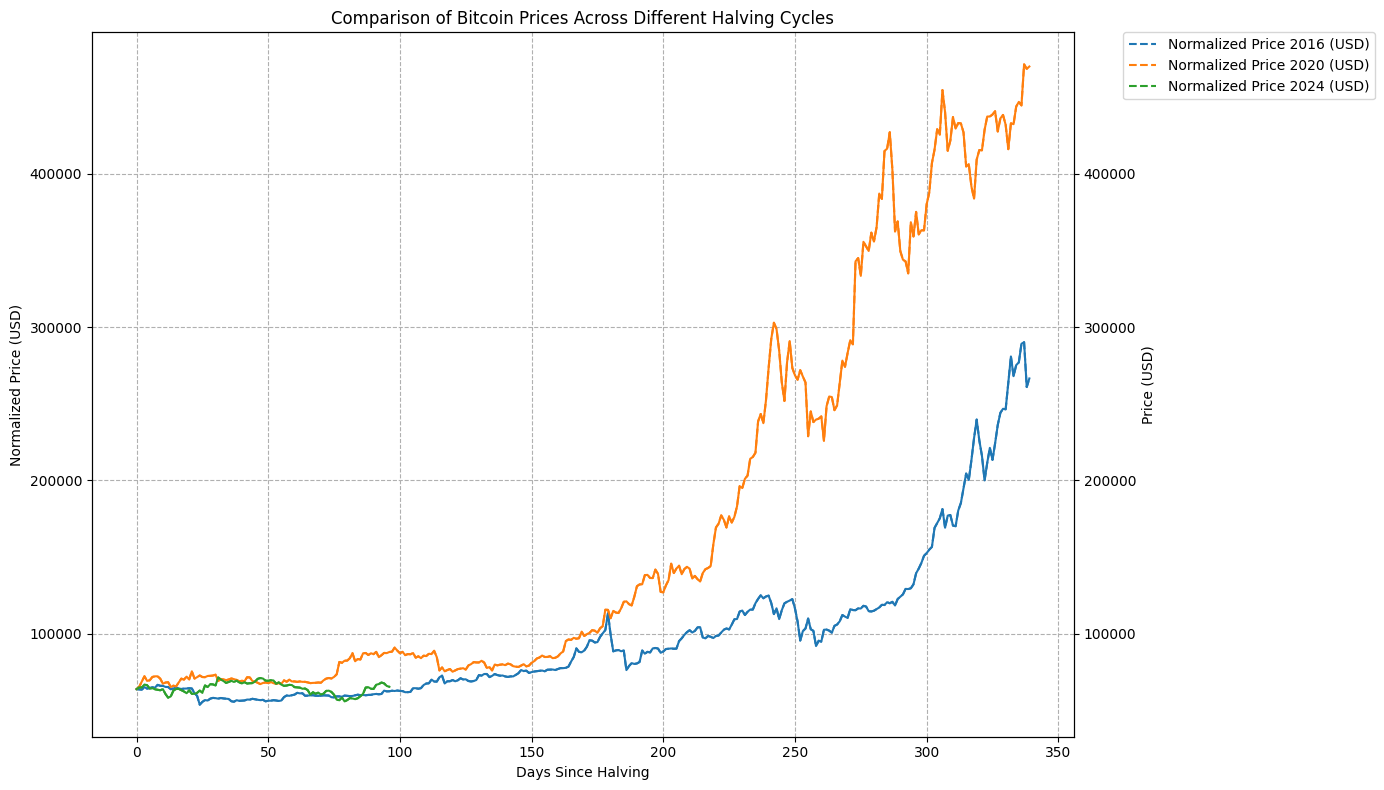

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded comparison CSV file
file_path = 'bitcoin_halving_comparison.csv'
comparison_df = pd.read_csv(file_path, index_col=0)

# Normalize all prices to start from 63851 (price at the day of the 4th halving)
start_price = 63851

for column in comparison_df.columns:
    if 'Log Scale' not in column:
        comparison_df[column] = comparison_df[column] / comparison_df[column].iloc[0] * start_price

# Prepare the plot to display the comparison of Bitcoin prices across different halving cycles
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the normalized prices for each halving cycle
for column in comparison_df.columns:
    if 'Log Scale' not in column:
        ax1.plot(comparison_df.index, comparison_df[column], label=f'Normalized {column}', linestyle='--')

# Create a secondary y-axis for the linear scale prices of the halving cycles
ax2 = ax1.twinx()
ax2.set_ylabel('Price (USD)')

# Plot the actual prices for each halving cycle on the secondary y-axis
for column in comparison_df.columns:
    if 'Log Scale' not in column:
        ax2.plot(comparison_df.index, comparison_df[column], label=column, linestyle='-')

# Customize the plot
ax1.set_xlabel('Days Since Halving')
ax1.set_ylabel('Normalized Price (USD)')
ax1.set_title('Comparison of Bitcoin Prices Across Different Halving Cycles')
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

ax1.grid(True, which="both", ls="--")
fig.tight_layout()

# Display the plot
plt.show()

In [1]:
import yfinance as yf
import pandas as pd

# Definisikan ticker untuk Bitcoin
ticker = 'BTC-USD'

# Definisikan tanggal awal dan akhir
start_date = '2016-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Download data harga Bitcoin
data = yf.download(ticker, start=start_date, end=end_date)

# Simpan data ke dalam file CSV
data.to_csv('bitcoin_price_since_2016.csv')

print("Data harga Bitcoin sejak 2016 berhasil diunduh dan disimpan sebagai 'bitcoin_price_since_2016.csv'")

[*********************100%%**********************]  1 of 1 completed

Data harga Bitcoin sejak 2016 berhasil diunduh dan disimpan sebagai 'bitcoin_price_since_2016.csv'


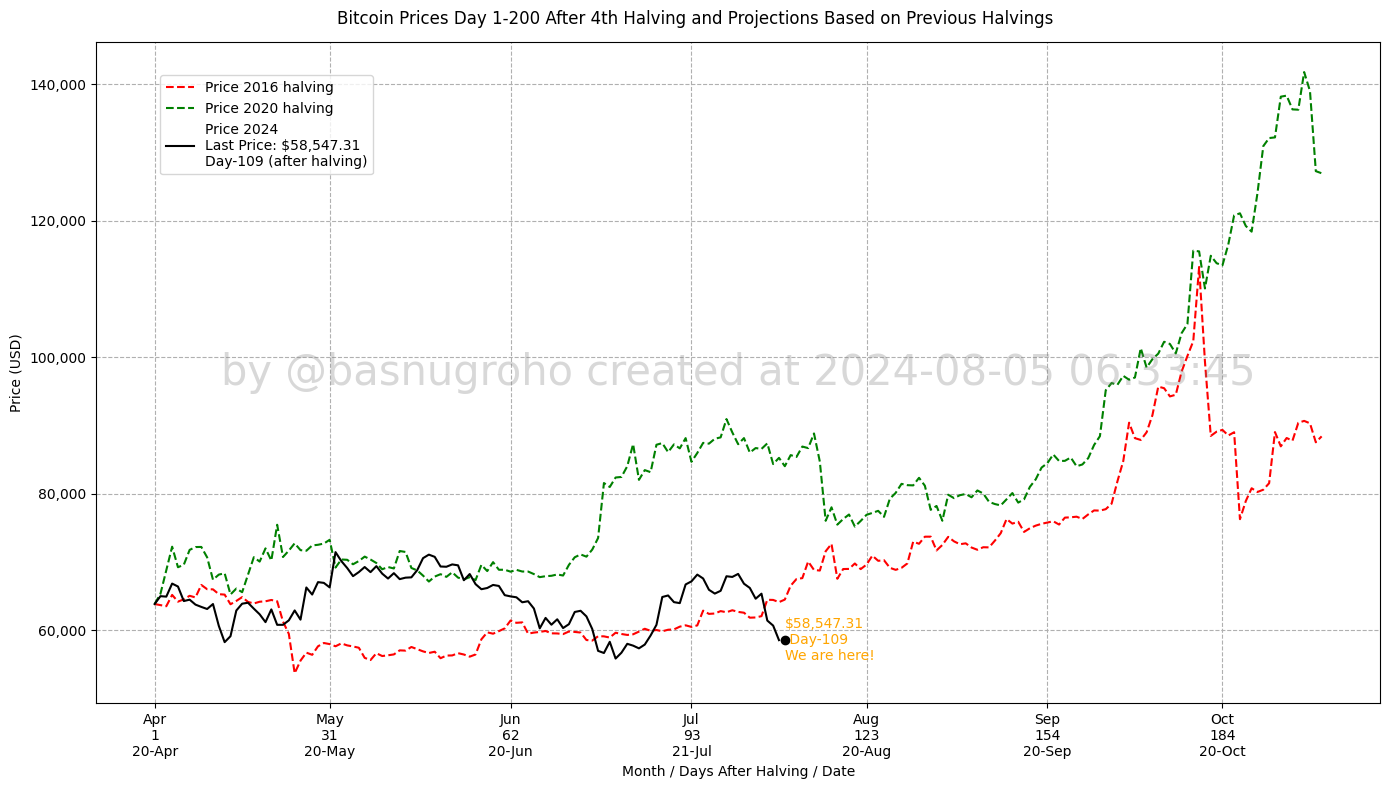

In [2]:
import datetime
import matplotlib.pyplot as plt

def plot_bitcoin_prices_after_halving(data, halving_dates, start_price, days_after_halving=339):
    # Prepare the plot including actual prices, normalized to the starting price of the 4th halving
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot the normalized prices for the 2nd and 3rd halving cycles
    for year in ['2016', '2020']:
        halving_date = pd.to_datetime(halving_dates[year])
        halving_data = data[(data.index >= halving_date) & (data.index <= halving_date + pd.DateOffset(days=days_after_halving))].copy()
        halving_data['DaysSinceHalving'] = (halving_data.index - halving_date).days + 1
        normalized_price = halving_data['Close'] / halving_data['Close'].iloc[0] * start_price  # Normalize prices
        label = f'Price {year} halving'
        color = 'red' if year == '2016' else 'green'
        ax1.plot(halving_data['DaysSinceHalving'], normalized_price, label=label, color=color, linestyle='--')

    # Plot the normalized prices for the 4th halving cycle
    halving_date_2024 = pd.to_datetime(halving_dates['2024'])
    halving_data_2024 = data[(data.index >= halving_date_2024) & (data.index <= halving_date_2024 + pd.DateOffset(days=days_after_halving))].copy()
    halving_data_2024['DaysSinceHalving'] = (halving_data_2024.index - halving_date_2024).days + 1
    normalized_price_2024 = halving_data_2024['Close'] / halving_data_2024['Close'].iloc[0] * start_price
    ax1.plot(halving_data_2024['DaysSinceHalving'], normalized_price_2024, label=f'Price 2024\nLast Price: ${halving_data_2024["Close"].iloc[-1]:,.2f}\nDay-{days_since_halving_2024_corrected + 1} (after halving)', color='black', linestyle='-')
    
    # Add a point marker for the last actual price
    ax1.plot(days_since_halving_2024_corrected + 1, normalized_price_2024.iloc[-1], 'o', color='black')

    # Label the last actual price with "We are here!" indication
    ax1.text(days_since_halving_2024_corrected + 1, normalized_price_2024.iloc[-1], f'${halving_data_2024["Close"].iloc[-1]:,.2f}\n Day-{days_since_halving_2024_corrected + 1}\nWe are here!', color='orange', fontsize=10, verticalalignment='center')

    # Customize the x-axis to show month labels and days since halving
    month_labels = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
    month_positions = [1, 31, 62, 93, 123, 154, 184, 215, 246, 276, 307, 337, 367, 398, 428, 459, 489, 520, 550, 581]
    days_labels = [f'{i}' for i in month_positions if i <= days_after_halving]
    date_labels = pd.date_range(start=halving_date_2024, periods=days_after_halving + 1, freq='D').strftime('%d-%b')

    ax1.set_xticks(month_positions[:len(days_labels)])
    ax1.set_xticklabels([f'{month}\n{day}\n{date}' for month, day, date in zip(month_labels[:len(days_labels)], days_labels, date_labels[month_positions[:len(days_labels)]])])

    # Format y-axis with thousand separators
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

    # Add a transparent text annotation as watermark
    annotation_text = f'by @basnugroho created at {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'
    plt.text(0.5, 0.5, annotation_text, fontsize=30, color='grey', alpha=0.3, ha='center', va='center', rotation=0, transform=ax1.transAxes)

    # Customize the plot
    fig.suptitle(f'Bitcoin Prices Day 1-{days_after_halving} After 4th Halving and Projections Based on Previous Halvings')
    ax1.set_xlabel('Month / Days After Halving / Date')
    ax1.set_ylabel('Price (USD)')
    ax1.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), borderaxespad=0.)
    ax1.grid(True, which="both", ls="--")
    fig.tight_layout()

    # Display the plot
    plt.show()

# Define the halving dates with correct date for 2024
halving_dates = {
    '2016': '2016-07-09',
    '2020': '2020-05-11',
    '2024': '2024-04-19',  # Corrected date for 2024 halving
}

# Get the starting price of the 4th halving cycle
halving_date_2024 = pd.to_datetime(halving_dates['2024'])
start_price_2024 = data.loc[halving_date_2024]['Close']

# Calculate the correct current day since the halving
days_since_halving_2024_corrected = (pd.Timestamp.today() - halving_date_2024).days
data = pd.read_csv('bitcoin_price_since_2016.csv', index_col='Date', parse_dates=True)
# Call the function with the specified number of days
plot_bitcoin_prices_after_halving(data, halving_dates, start_price_2024, days_after_halving=200)